In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.style.use('bmh')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TCS.csv to TCS.csv


In [ ]:
df = pd.read_csv('TCS.csv') 
df.head(6)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624
5,2004-09-01,TCS,EQ,988.10,990.0,995.0,983.60,986.00,987.90,989.68,2491943,2.466236e+14,NaN,790586,0.3173


In [ ]:
df.shape

(4139, 15)

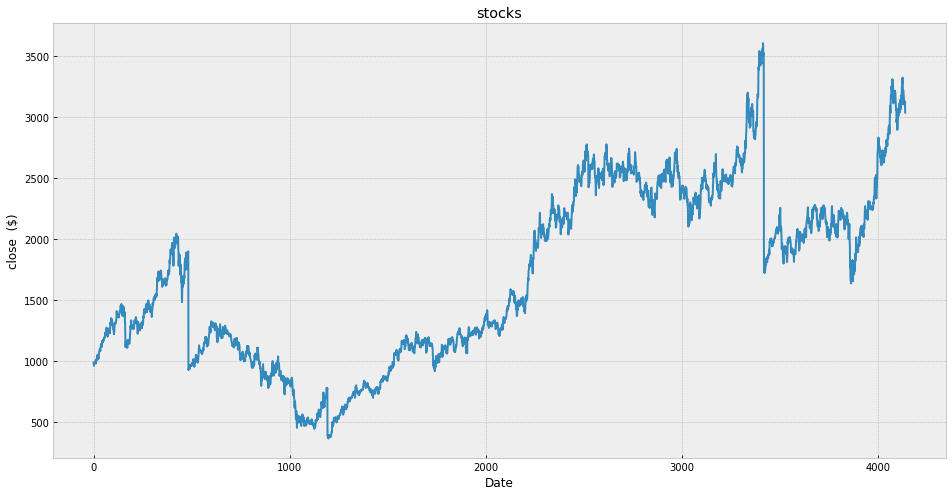

In [ ]:
plt.figure(figsize=(16,8))
plt.title('stocks')
plt.xlabel('Date')
plt.ylabel('close  ($)')
plt.plot(df['Close'])

plt.show()

In [ ]:
df.head(4)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294


In [ ]:
future_days = 25
df['prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,prediction
4135,2021-04-27,TCS,EQ,3100.80,3106.00,3136.10,3103.0,3132.75,3132.00,3122.18,1471417,4.594036e+14,97077.0,849767,0.5775,NaN
4136,2021-04-28,TCS,EQ,3132.00,3149.95,3151.00,3112.0,3123.00,3124.10,3125.72,1639037,5.123176e+14,76017.0,847762,0.5172,NaN
4137,2021-04-29,TCS,EQ,3124.10,3145.60,3157.35,3105.5,3114.45,3115.25,3130.83,1621395,5.076306e+14,98275.0,837567,0.5166,NaN
4138,2021-04-30,TCS,EQ,3115.25,3099.00,3132.05,3020.0,3040.00,3035.65,3063.19,3072305,9.411057e+14,157829.0,1942473,0.6323,NaN


In [ ]:
x = np.array(df.drop(['prediction'], 1))[:-future_days]
print(x)

[['2004-08-25' 'TCS' 'EQ' ... nan 5206360 0.3042]
 ['2004-08-26' 'TCS' 'EQ' ... nan 1294899 0.2561]
 ['2004-08-27' 'TCS' 'EQ' ... nan 976527 0.2549]
 ...
 ['2021-03-18' 'TCS' 'EQ' ... 164183.0 1670043 0.4568]
 ['2021-03-19' 'TCS' 'EQ' ... 153489.0 3138698 0.5433]
 ['2021-03-22' 'TCS' 'EQ' ... 137406.0 1165276 0.413]]


In [ ]:
y=np.array(df['prediction'])[:-future_days]
print(y)

[1031.   1027.1  1047.7  ... 3124.1  3115.25 3035.65]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [ ]:
tree = DecisionTreeRegressor().fit(x_train,y_train)
lr = LinearRegression().fit(x_train,y_train)


In [ ]:
x_future = df.drop(['prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([['2021-02-15', 'TCS', 'EQ', 3190.8, 3209.0, 3209.0, 3131.55,
        3149.0, 3139.85, 3156.8, 2630853, 830506920135000.0, 143467.0,
        1214830, 0.4618],
       ['2021-02-16', 'TCS', 'EQ', 3139.85, 3150.0, 3167.65, 3100.0,
        3113.0, 3108.8, 3122.98, 3435770, 1072984966590000.0, 171006.0,
        1651579, 0.4807],
       ['2021-02-17', 'TCS', 'EQ', 3108.8, 3105.1, 3132.85, 3045.55,
        3073.45, 3073.1, 3076.93, 3678426, 1131826212510000.0, 204277.0,
        1516981, 0.4124],
       ['2021-02-18', 'TCS', 'EQ', 3073.1, 3065.0, 3097.9, 3031.0,
        3055.0, 3057.35, 3057.94, 4189909, 1281251032700000.0, 176370.0,
        2042317, 0.4874000000000001],
       ['2021-02-19', 'TCS', 'EQ', 3057.35, 3058.0, 3087.15, 3016.15,
        3078.0, 3071.85, 3047.73, 3725028, 1135288752785000.0, 130797.0,
        1878814, 0.5044],
       ['2021-02-22', 'TCS', 'EQ', 3071.85, 3096.0, 3096.0, 2943.15,
        2955.5, 2958.45, 2999.26, 5366696, 1609612100220000.0, 266786.0,
        280